## 0. Contents

## I. Bayes Nets

In [1]:
from libpgm.graphskeleton import GraphSkeleton
from libpgm.nodedata import NodeData
from libpgm.discretebayesiannetwork import DiscreteBayesianNetwork
from libpgm.tablecpdfactorization import TableCPDFactorization

In [169]:
from IPython.display import Image, display

### A. Simple Query

** a. BN Graph **

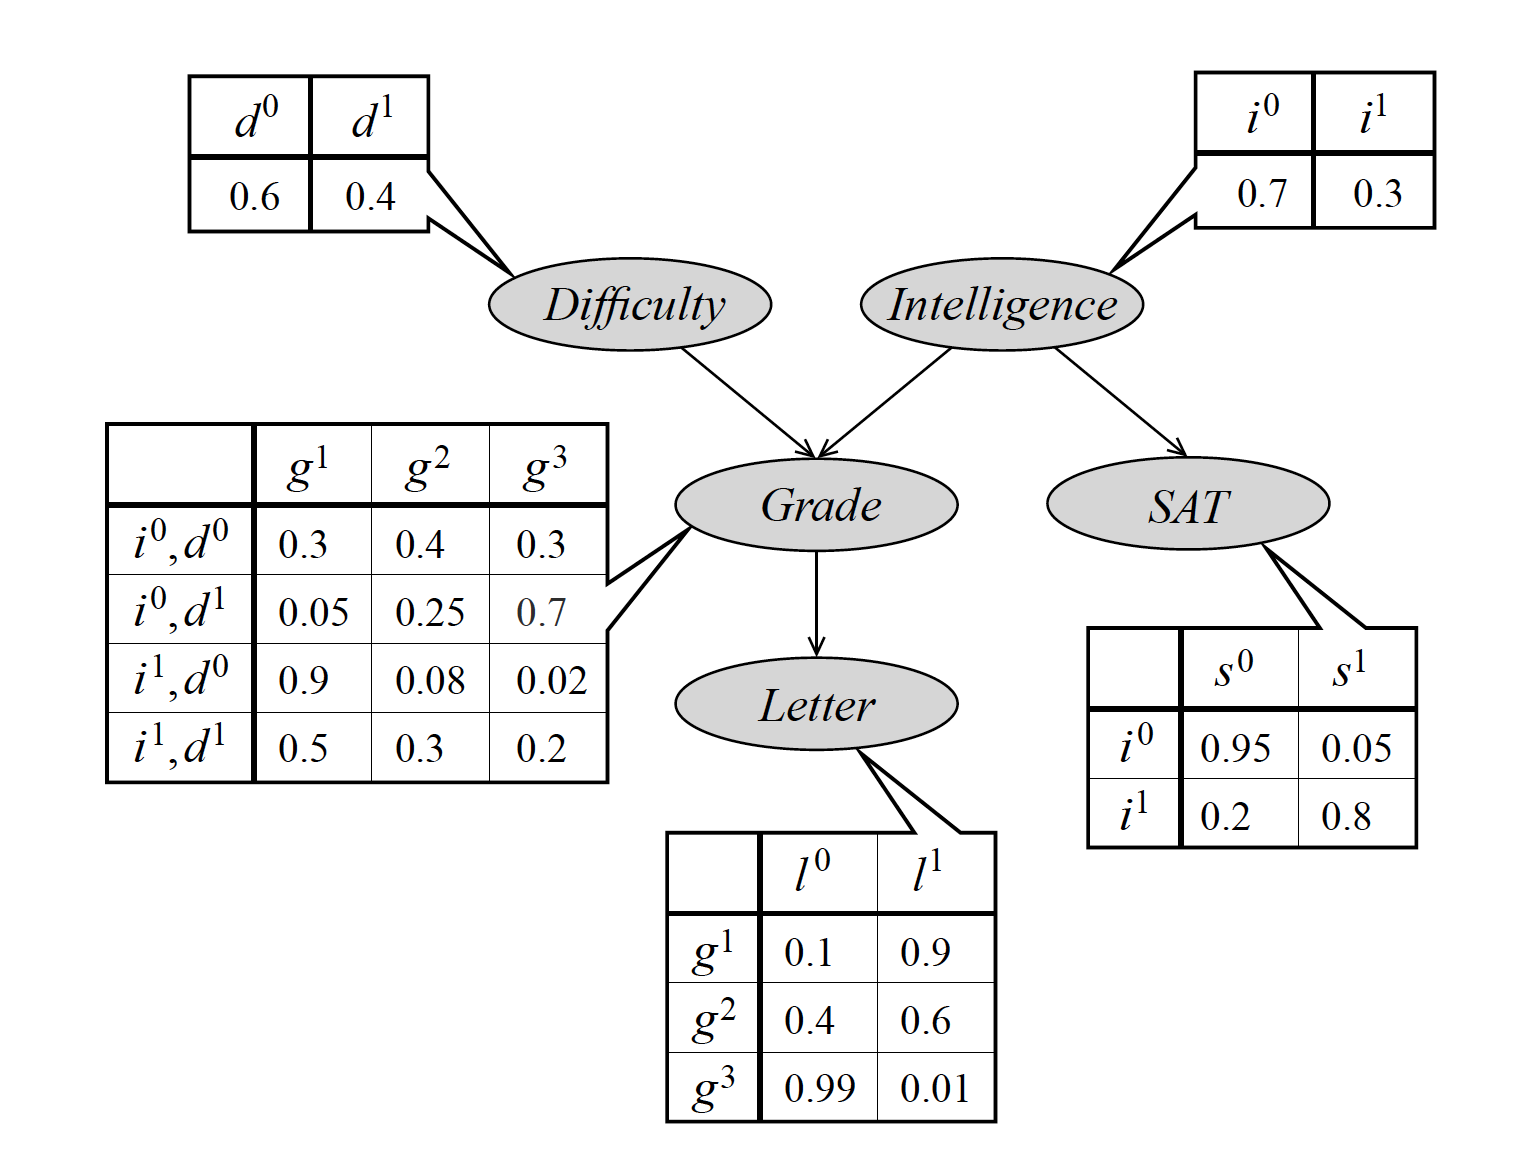

In [174]:
display(Image(filename='/Users/jacobsw/Desktop/UNIV/LOGIC_MATH_COMPUTATION/PGM_ADVANCED/IMPLEMENTATION/FIGS/student_bn.png',
              width='50%'))

** b. Load Data **

In [5]:
dr1 = "/Users/jacobsw/Desktop/UNIV/LOGIC_MATH_COMPUTATION/PGM_ADVANCED/IMPLEMENTATION/9004OS_Code/9004OS_02_Code/"

In [163]:
V = ['Difficulty','Intelligence','Grade','Letter','SAT']
E = [['Difficulty','Grade'],
     ['Intelligence','Grade'],
     ['Grade','Letter'],
     ['Intelligence','SAT']]
Vdata = {
    'Difficulty': {
        'parents': None,
        'children': ['Grade'],
        'ord': 1,
        'numoutcomes': 2,
        'cprob': [.6,.4],
        'vals': ["0","1"]
    },
    'Intelligence': {
        'parents': None,
        'children': ['Grade','SAT'], 
        'ord': 2,
        'numoutcomes': 2,
        'cprob': [.7,.3],
        'vals': ["0","1"]
    },
    'Grade': {
        'parents': ['Intelligence','Difficulty'],
        'children': ['Letter'],
        'ord': 3,
        'numoutcomes': 3,
        'cprob': {"['0', '0']": [.3,.4,.3], # the space between two 'x's in key is obligatory.
                  "['0', '1']": [.05,.25,.7],
                  "['1', '0']": [.9,.08,.02],
                  "['1', '1']": [.5,.3,.2]},
        'vals': ["1","2","3"]
    },
    'Letter': {
        'parents': ['Grade'],
        'children': None,
        'ord': 5,
        'numoutcomes': 2,
        'cprob': {"['1']": [.1,.9],
                  "['2']": [.4,.6],
                  "['3']": [.99,.01]},
        'vals': ["0","1"]
    },
    'SAT': {
        'parents': ['Intelligence'],
        'children': None,
        'ord': 4,
        'numoutcomes': 2,
        'cprob': {"['0']": [.95,.05],
                  "['1']": [.2,.8]},
        'vals': ["0","1"]
    } 
}

In [164]:
def get_table_cpd(dr,filename):
    nd = NodeData()
    skel = GraphSkeleton()
    json_path = dr+filename
    nd.load(json_path)
    skel.load(json_path)
    bn = DiscreteBayesianNetwork(skel,nd)
    table_cpd = TableCPDFactorization(bn)
    return table_cpd

In [165]:
student = {'Vdata': Vdata, 'V': V, 'E': E}

In [166]:
def encode_data(path, filename, data_dict):
    with open(path+filename,'w') as f:
        json.dump(data_dict,f)

In [167]:
encode_data(dr1, 'student.txt', student)

** c. Query **

In [168]:
tcpd = get_table_cpd(dr1, 'student.txt')

In [176]:
tcpd.specificquery(query=dict(Intelligence='1'),evidence=dict(Grade='3')) # P(i=1|g=3)

0.07894736842105264

### B. Naive Bayes

In [178]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer

In [181]:
%%time
cats = ['alt.atheism', 'sci.med']
newsgroups = fetch_20newsgroups(subset='all', remove=('headers','footers','quotes'), categories=cats)

CPU times: user 3.08 s, sys: 138 ms, total: 3.22 s
Wall time: 3.22 s


In [188]:
print type(newsgroups)
print type(newsgroups.data), len(newsgroups.data) # data is a list of sentences in strings.
print type(newsgroups.target), len(newsgroups.target) # target is an array of 0/1s, labels of sentences' classes.

<class 'sklearn.datasets.base.Bunch'>
<type 'list'> 1789
<type 'numpy.ndarray'> 1789


In [191]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups.data)

In [194]:
vectors # unique word count = 66940; 1789 featurized entries, each corresponds to 1 sentence.

<1789x24202 sparse matrix of type '<type 'numpy.float64'>'
	with 183869 stored elements in Compressed Sparse Row format>

In [197]:
split_data = map(lambda s:s.split(' '), newsgroups.data)
words = [word for sent in split_data for word in sent]

In [201]:
clf = MultinomialNB(alpha=.01)
print "CrossValidation Score: ", np.mean(cross_validation.cross_val_score(clf, vectors, 
                                                                          newsgroups.target, scoring='f1'))

CrossValidation Score:  0.954420443456
